In [22]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
import warnings 

warnings.filterwarnings('ignore')

In [24]:
pd.set_option('display.max_rows', None)

In [25]:
train=pd.read_csv('TRAIN.csv')
test=pd.read_csv('TEST_FINAL.csv')
sample=pd.read_csv('SAMPLE.csv')

In [26]:
train.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [27]:
test.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
0,T1188341,171,S4,L2,R3,2019-06-01,0,No
1,T1188342,172,S1,L1,R1,2019-06-01,0,No
2,T1188343,173,S4,L2,R1,2019-06-01,0,No
3,T1188344,174,S1,L1,R4,2019-06-01,0,No
4,T1188345,170,S1,L1,R2,2019-06-01,0,No


In [28]:
sample.head()

,ID,Sales
0,T1188341,42275
1,T1188342,42275
2,T1188343,42275
3,T1188344,42275
4,T1188345,42275


## EDA analysis 

### check for null values

In [29]:
train.isnull().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
#Order           0
Sales            0
dtype: int64

In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


In [31]:
train.describe()

,Store_id,Holiday,#Order,Sales
count,188340.000000,188340.000000,188340.000000,188340.000000
mean,183.000000,0.131783,68.205692,42784.327982
std,105.366308,0.338256,30.467415,18456.708302
min,1.000000,0.000000,0.000000,0.000000
25%,92.000000,0.000000,48.000000,30426.000000
50%,183.000000,0.000000,63.000000,39678.000000
75%,274.000000,0.000000,82.000000,51909.000000
max,365.000000,1.000000,371.000000,247215.000000


#-- NO null values found # data is clean 
#-- We can proceed with Exploratory analysis

# univariate analysis

In [32]:
train.columns

Index(['ID', 'Store_id', 'Store_Type', 'Location_Type', 'Region_Code', 'Date',
       'Holiday', 'Discount', '#Order', 'Sales'],
      dtype='object')

In [33]:
train.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [34]:
train['Month']=pd.DatetimeIndex(train['Date']).month

In [35]:
train['Year']=pd.DatetimeIndex(train['Date']).year

In [36]:
train.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales,Month,Year
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84,1,2018
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12,1,2018
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20,1,2018
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16,1,2018
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52,1,2018


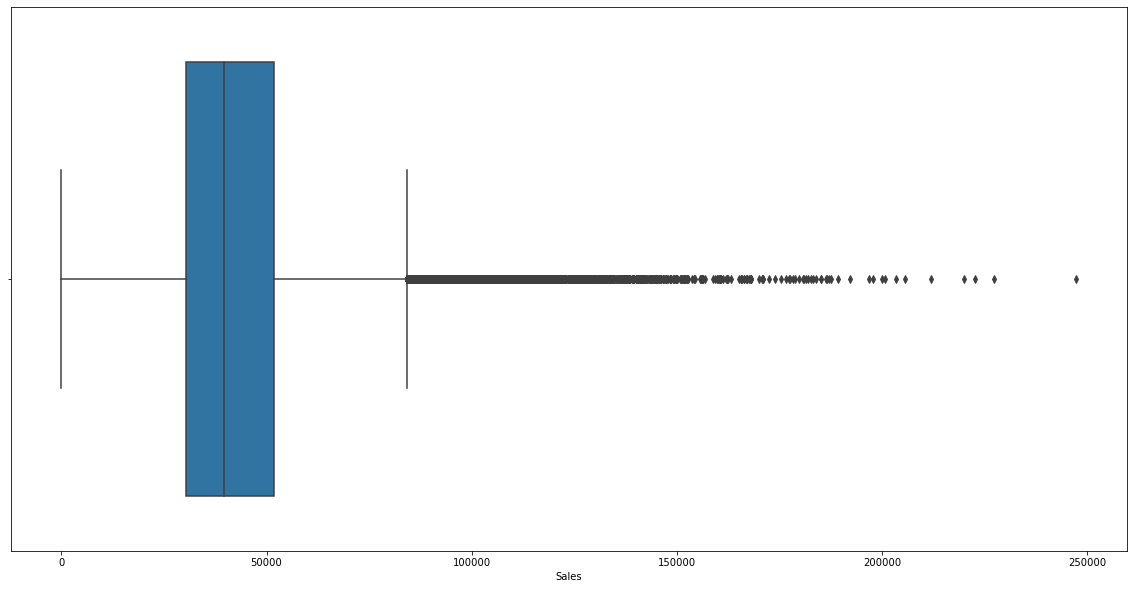

In [37]:
plt.figure(figsize=(20,10))
sns.boxplot(train['Sales'])

plt.show()

In [38]:
train.sort_values(by='Sales',ascending=False).head(15)

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales,Month,Year
178648,T1178649,175,S4,L2,R1,2019-05-05,0,Yes,371,247215.00,5,2019
178372,T1178373,87,S4,L2,R3,2019-05-04,0,Yes,233,227127.00,5,2019
178304,T1178305,175,S4,L2,R1,2019-05-04,0,Yes,348,222516.00,5,2019
63672,T1063673,337,S4,L2,R1,2018-06-24,0,Yes,316,219984.00,6,2018
168624,T1168625,315,S4,L2,R1,2019-04-07,0,Yes,331,211914.00,4,2019
178553,T1178554,146,S4,L2,R1,2019-05-05,0,Yes,306,205605.00,5,2019
68703,T1068704,175,S4,L2,R1,2018-07-08,0,Yes,333,203337.00,7,2018
155790,T1155791,175,S4,L2,R1,2019-03-03,0,Yes,347,200742.00,3,2019
183128,T1183129,175,S4,L2,R1,2019-05-17,0,Yes,309,199839.00,5,2019
183251,T1183252,175,S4,L2,R1,2019-05-18,1,No,361,197840.61,5,2019


In [39]:
train.shape

(188340, 12)

In [40]:
#train[train.Sales < 200000]

In [41]:
#train.shape

In [42]:
train=train[train.Sales < 200000]

In [43]:
train.shape

(188332, 12)

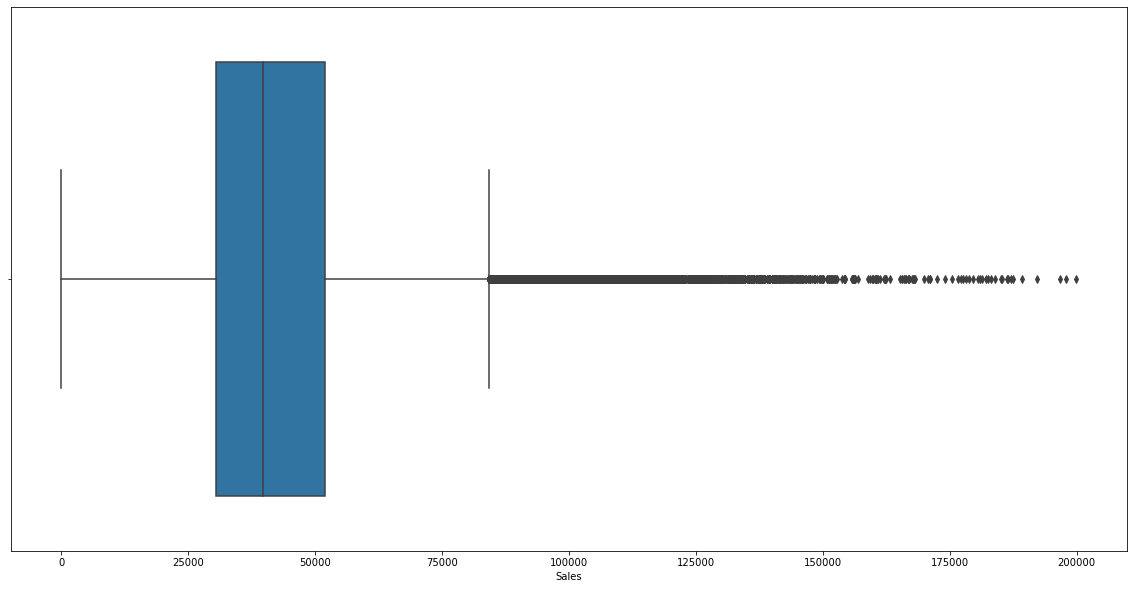

In [44]:
plt.figure(figsize=(20,10))
sns.boxplot(train['Sales'])

plt.show()

Store_Type	Location_Type	Region_Code Holiday	Discount Month	Year

-- Need to done analysis 

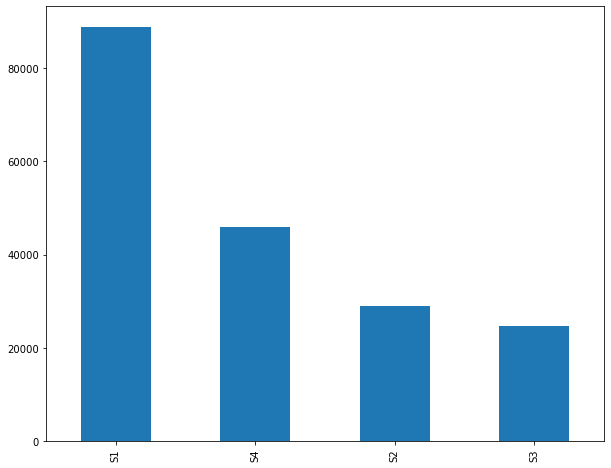

In [65]:
plt.figure(figsize=(10,8))
train.Store_Type.value_counts().plot(kind='bar')
plt.show()

Store S1 have high Frequencey 

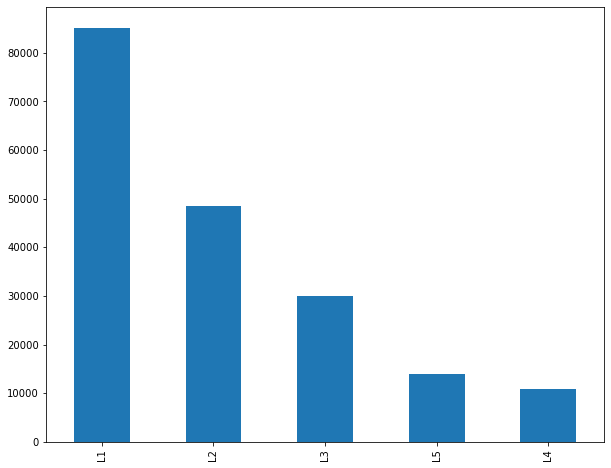

In [66]:
plt.figure(figsize=(10,8))
train.Location_Type.value_counts().plot(kind='bar')
plt.show()

Location typ1 L1 have high freq

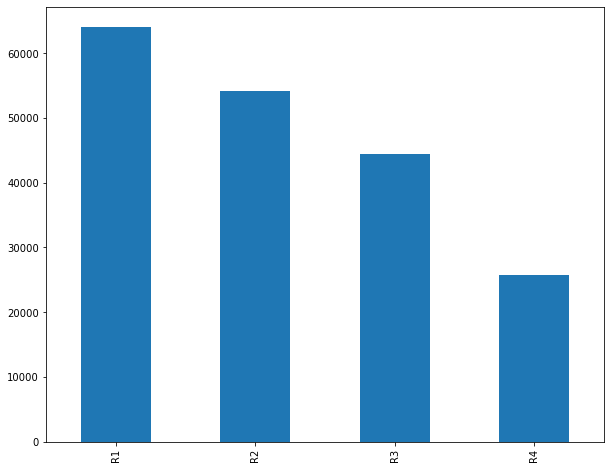

In [68]:
plt.figure(figsize=(10,8))
train.Region_Code.value_counts().plot(kind='bar')
plt.show()

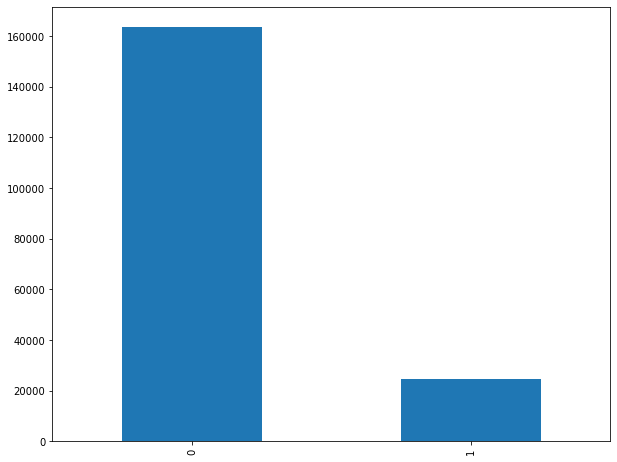

In [69]:
plt.figure(figsize=(10,8))
train.Holiday.value_counts().plot(kind='bar')
plt.show()

People buying more stuff on non holidays

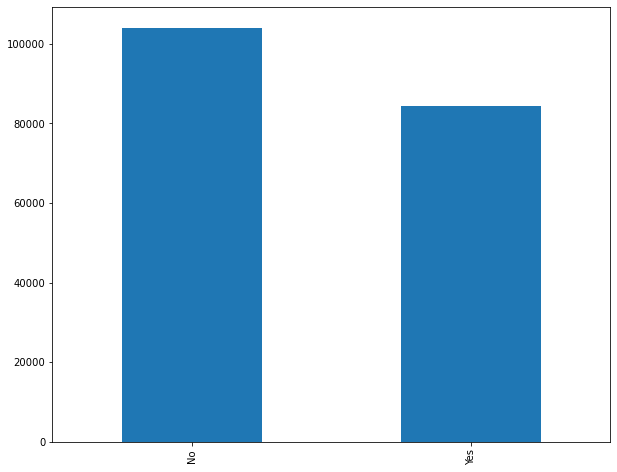

In [70]:
plt.figure(figsize=(10,8))
train.Discount.value_counts().plot(kind='bar')
plt.show()

No significant diff in discount and non discount

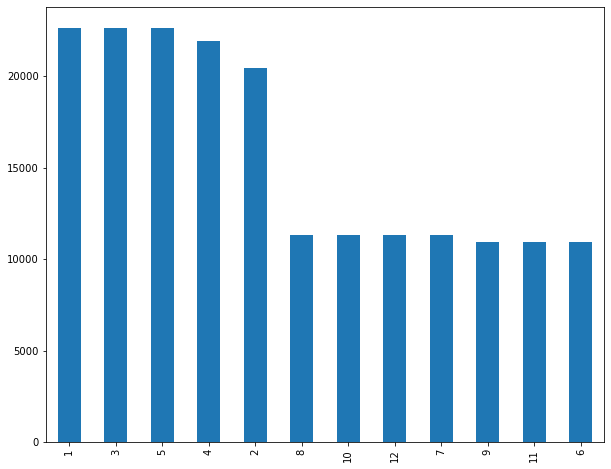

In [71]:
plt.figure(figsize=(10,8))
train.Month.value_counts().plot(kind='bar')
plt.show()

## people buying more in month of Jan , Mar ,May , Apr,FEB (almost same)

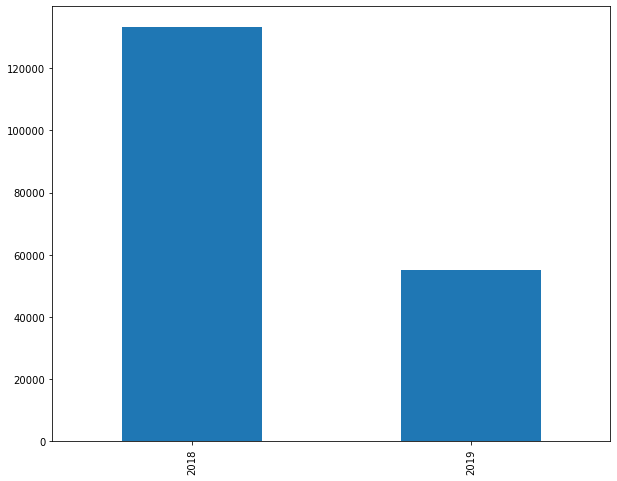

In [73]:
plt.figure(figsize=(10,8))
train.Year.value_counts().plot(kind='bar')
plt.show()

Less sales in Year 2019

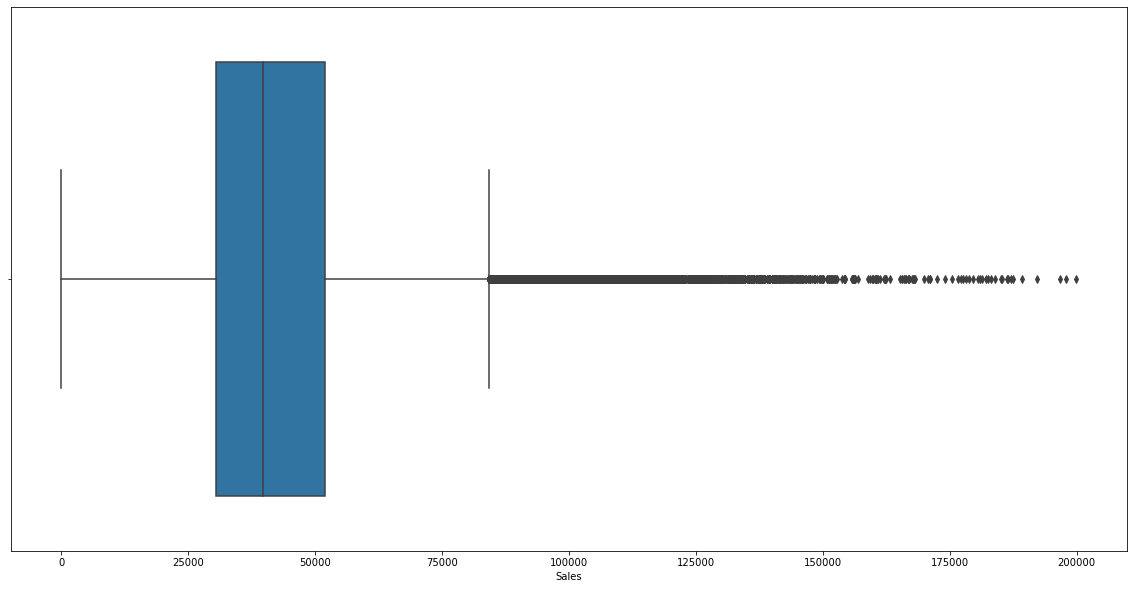

In [74]:
plt.figure(figsize=(20,10))
sns.boxplot(train['Sales'])

plt.show()

# Bi--variant Analysis

In [75]:
train.columns

Index(['ID', 'Store_id', 'Store_Type', 'Location_Type', 'Region_Code', 'Date',
       'Holiday', 'Discount', '#Order', 'Sales', 'Month', 'Year'],
      dtype='object')

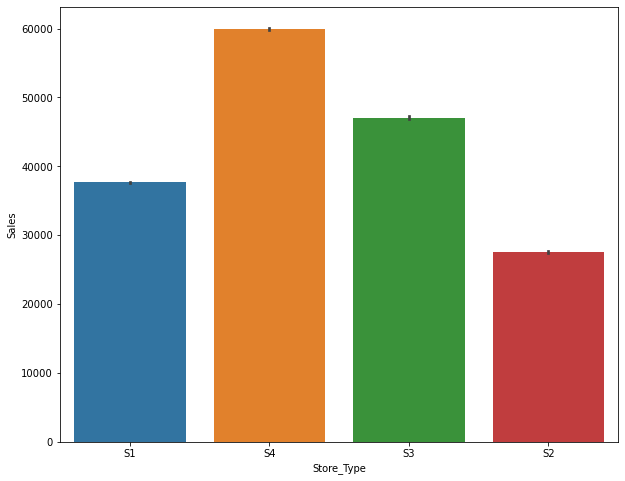

In [77]:
plt.figure(figsize=(10,8))
sns.barplot(x='Store_Type',y='Sales',data=train)

plt.show()

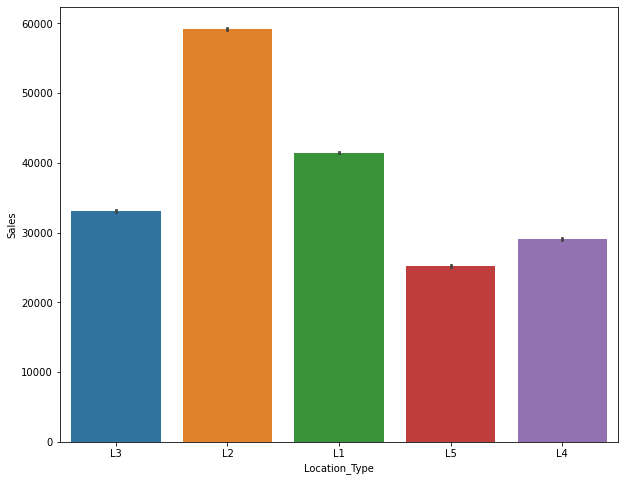

In [78]:
plt.figure(figsize=(10,8))
sns.barplot(x='Location_Type',y='Sales',data=train)

plt.show()

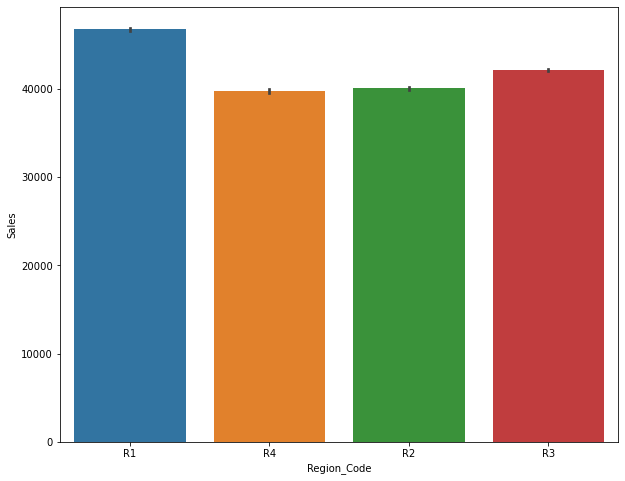

In [80]:
plt.figure(figsize=(10,8))
sns.barplot(x='Region_Code',y='Sales',data=train)

plt.show()

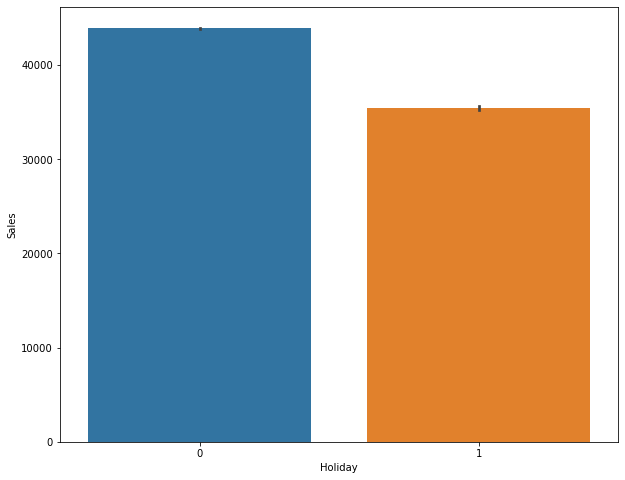

In [81]:
plt.figure(figsize=(10,8))
sns.barplot(x='Holiday',y='Sales',data=train)

plt.show()

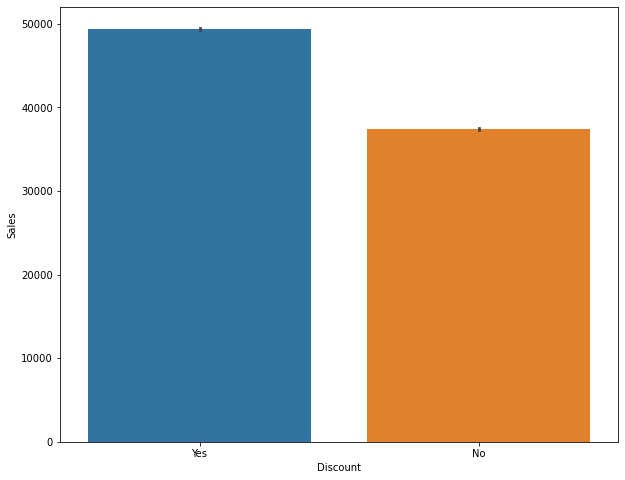

In [82]:
plt.figure(figsize=(10,8))
sns.barplot(x='Discount',y='Sales',data=train)

plt.show()

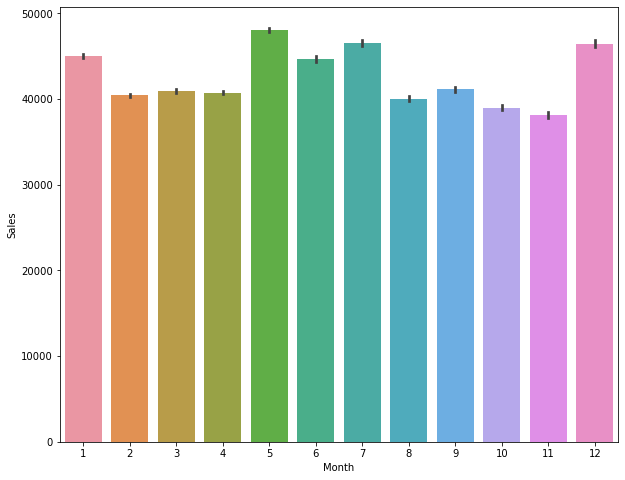

In [83]:
plt.figure(figsize=(10,8))
sns.barplot(x='Month',y='Sales',data=train)

plt.show()

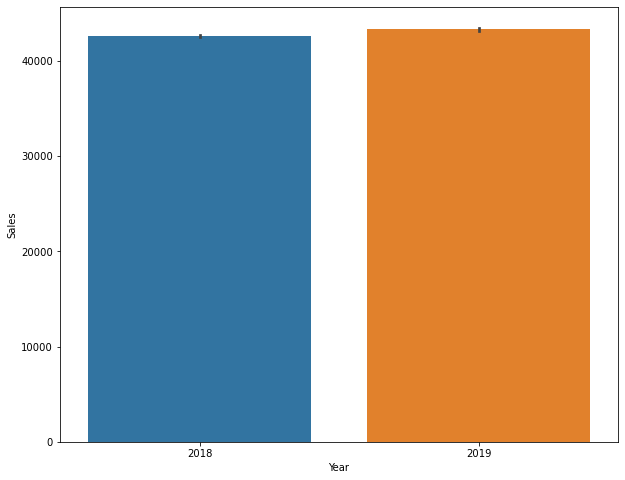

In [84]:
plt.figure(figsize=(10,8))
sns.barplot(x='Year',y='Sales',data=train)

plt.show()

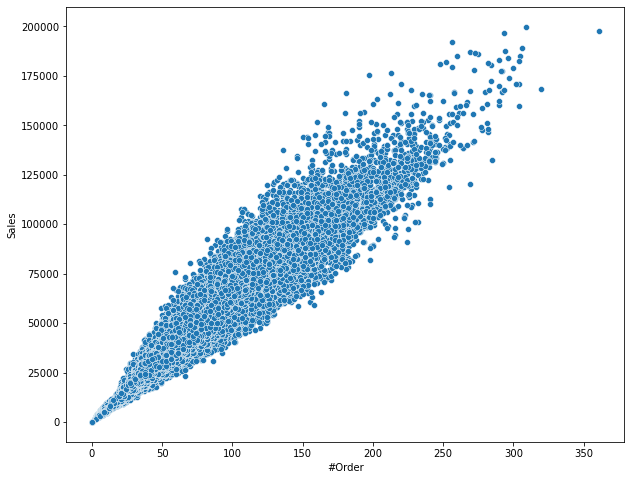

In [88]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='#Order',y='Sales',data=train)

plt.show()

# *Inference From Bivariate analysis*

### 1.Strong Corelateation with Sales and no of orders which is logically True [more sales for more number of orders]
### 2.No relation among Year , Month , Holiday , Discount on Sales 
### 3.Sales is more for S4, L2 and R1 with respect to Sales

In [89]:
train.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales,Month,Year
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84,1,2018
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12,1,2018
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20,1,2018
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16,1,2018
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52,1,2018


In [92]:
train_df=train[['Store_Type','Location_Type','Region_Code','Holiday','Discount','#Order','Month','Year']]

In [95]:
test['Sales']='test'

test.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,Sales
0,T1188341,171,S4,L2,R3,2019-06-01,0,No,test
1,T1188342,172,S1,L1,R1,2019-06-01,0,No,test
2,T1188343,173,S4,L2,R1,2019-06-01,0,No,test
3,T1188344,174,S1,L1,R4,2019-06-01,0,No,test
4,T1188345,170,S1,L1,R2,2019-06-01,0,No,test


In [96]:
test['Month']=pd.DatetimeIndex(test['Date']).month
test['Year']=pd.DatetimeIndex(test['Date']).year

In [97]:
test.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,Sales,Month,Year
0,T1188341,171,S4,L2,R3,2019-06-01,0,No,test,6,2019
1,T1188342,172,S1,L1,R1,2019-06-01,0,No,test,6,2019
2,T1188343,173,S4,L2,R1,2019-06-01,0,No,test,6,2019
3,T1188344,174,S1,L1,R4,2019-06-01,0,No,test,6,2019
4,T1188345,170,S1,L1,R2,2019-06-01,0,No,test,6,2019


In [98]:
train.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales,Month,Year
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84,1,2018
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12,1,2018
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20,1,2018
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16,1,2018
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52,1,2018


In [99]:
##Predicting number of orders for test set

In [103]:
print(test.shape)
print(train.shape)

(22265, 11)
(188332, 12)


In [101]:
test.Store_Type.value_counts()

S1    10492
S4     5429
S2     3416
S3     2928
Name: Store_Type, dtype: int64

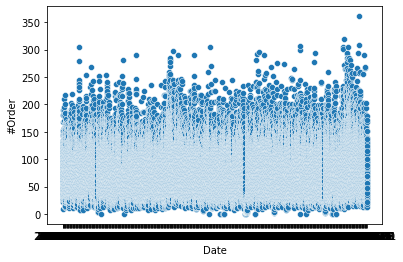

In [112]:
sns.line(x='Date',y='#Order',data=train)

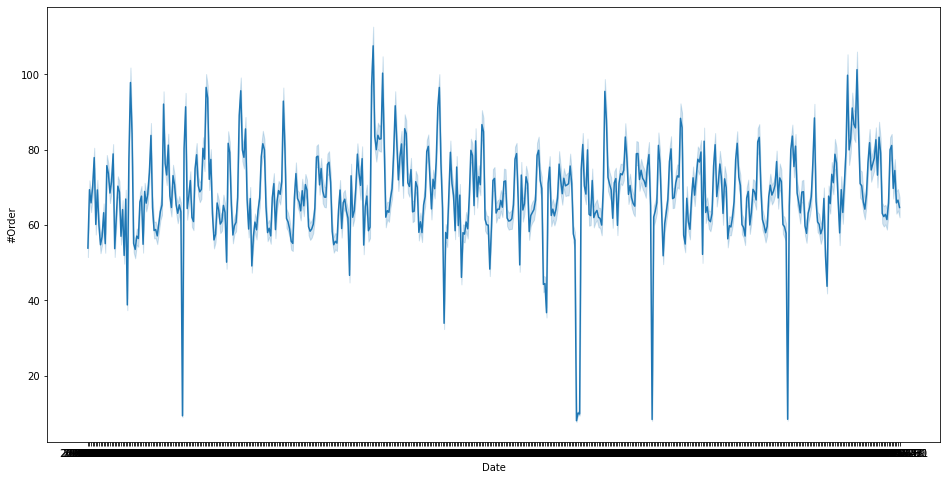

In [116]:
plt.figure(figsize=(16,8))
sns.lineplot(x='Date',y='#Order',data=train)

In [121]:
test['#Order']=train['#Order'].shift(-22265)  #test.shape

## Since Number of order is following seasonal trend , Hence I have shifted the dataset with test.shape :) 

In [122]:
test.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,Sales,Month,Year,#Order
0,T1188341,171,S4,L2,R3,2019-06-01,0,No,test,6,2019,68.0
1,T1188342,172,S1,L1,R1,2019-06-01,0,No,test,6,2019,117.0
2,T1188343,173,S4,L2,R1,2019-06-01,0,No,test,6,2019,57.0
3,T1188344,174,S1,L1,R4,2019-06-01,0,No,test,6,2019,82.0
4,T1188345,170,S1,L1,R2,2019-06-01,0,No,test,6,2019,110.0


In [123]:
test.isnull().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
Sales            0
Month            0
Year             0
#Order           0
dtype: int64

In [147]:
data=pd.concat([train,test],axis=0)

In [148]:
data.shape

(210597, 12)

# Preparing Model for Regression Analysis

In [149]:
from sklearn.preprocessing import LabelEncoder 

lr=LabelEncoder()

In [150]:
data.columns

Index(['ID', 'Store_id', 'Store_Type', 'Location_Type', 'Region_Code', 'Date',
       'Holiday', 'Discount', '#Order', 'Sales', 'Month', 'Year'],
      dtype='object')

In [151]:
data['Store_Type']=lr.fit_transform(data['Store_Type'])

In [152]:
data.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales,Month,Year
0,T1000001,1,0,L3,R1,2018-01-01,1,Yes,9.0,7011.84,1,2018
1,T1000002,253,3,L2,R1,2018-01-01,1,Yes,60.0,51789.12,1,2018
2,T1000003,252,2,L2,R1,2018-01-01,1,Yes,42.0,36868.2,1,2018
3,T1000004,251,1,L3,R1,2018-01-01,1,Yes,23.0,19715.16,1,2018
4,T1000005,250,1,L3,R4,2018-01-01,1,Yes,62.0,45614.52,1,2018


In [153]:
data['Location_Type']=lr.fit_transform(data['Location_Type'])  #loc_type
data['Region_Code']=lr.fit_transform(data['Region_Code'])  #Region_code
data['Discount']=lr.fit_transform(data['Discount'])  #Discount

In [154]:
data.head(10)

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales,Month,Year
0,T1000001,1,0,2,0,2018-01-01,1,1,9.0,7011.84,1,2018
1,T1000002,253,3,1,0,2018-01-01,1,1,60.0,51789.12,1,2018
2,T1000003,252,2,1,0,2018-01-01,1,1,42.0,36868.2,1,2018
3,T1000004,251,1,2,0,2018-01-01,1,1,23.0,19715.16,1,2018
4,T1000005,250,1,2,3,2018-01-01,1,1,62.0,45614.52,1,2018
5,T1000006,249,0,2,1,2018-01-01,1,1,39.0,34211.22,1,2018
6,T1000007,248,0,0,1,2018-01-01,1,1,40.0,35352.66,1,2018
7,T1000008,247,0,0,2,2018-01-01,1,1,64.0,52650.0,1,2018
8,T1000009,246,2,0,2,2018-01-01,1,1,62.0,42633.78,1,2018
9,T1000010,254,3,0,0,2018-01-01,1,1,87.0,62572.8,1,2018


In [155]:
data.Discount.value_counts()

0    116824
1     93773
Name: Discount, dtype: int64

In [156]:
train_df=data[data.Sales!='test']

train_df.shape

(188332, 12)

In [157]:
train_df.tail()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales,Month,Year
188335,T1188336,149,1,2,1,2019-05-31,1,1,51.0,37272.0,5,2019
188336,T1188337,153,3,1,0,2019-05-31,1,0,90.0,54572.64,5,2019
188337,T1188338,154,0,2,1,2019-05-31,1,0,56.0,31624.56,5,2019
188338,T1188339,155,2,0,1,2019-05-31,1,1,70.0,49162.41,5,2019
188339,T1188340,152,1,0,0,2019-05-31,1,0,47.0,37977.0,5,2019


In [158]:
train_df=train_df[['Store_Type','Location_Type','Region_Code','Holiday','Discount','Month','Year','#Order']]

train_df.shape

(188332, 8)

In [160]:
y=data[data.Sales!='test']['Sales']

In [161]:
X=train_df

In [162]:
print(X.shape)
print(y.shape)

(188332, 8)
(188332,)


In [159]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [163]:
from sklearn.model_selection import train_test_split

In [164]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

In [165]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(169498, 8)
(18834, 8)
(169498,)
(18834,)


In [166]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [167]:
y_pred=lr.predict(x_test)

In [168]:
print('R squared :',(r2_score(y_test,y_pred)))
print('RMSE :',np.sqrt(mean_squared_error(y_test,y_pred)))

R squared : 0.908351453458306
RMSE : 5425.843147862018


# --------------------------------------------------------------------------------------------------------

In [169]:
test_df=data[data.Sales=='test']

test_df.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales,Month,Year
0,T1188341,171,3,1,2,2019-06-01,0,0,68.0,test,6,2019
1,T1188342,172,0,0,0,2019-06-01,0,0,117.0,test,6,2019
2,T1188343,173,3,1,0,2019-06-01,0,0,57.0,test,6,2019
3,T1188344,174,0,0,3,2019-06-01,0,0,82.0,test,6,2019
4,T1188345,170,0,0,1,2019-06-01,0,0,110.0,test,6,2019


In [170]:
test_df=train_df[['Store_Type','Location_Type','Region_Code','Holiday','Discount','Month','Year','#Order']]

test_df.shape

(188332, 8)

In [171]:
y_pred_test=lr.predict(test_df)

In [172]:
test_df['Sales']=y_pred_test

In [173]:
test_df.head(10)

,Store_Type,Location_Type,Region_Code,Holiday,Discount,Month,Year,#Order,Sales
0,0,2,0,1,1,1,2018,9.0,8645.024635
1,3,1,0,1,1,1,2018,60.0,36671.659218
2,2,1,0,1,1,1,2018,42.0,26981.434034
3,1,2,0,1,1,1,2018,23.0,16031.529158
4,1,2,3,1,1,1,2018,62.0,43185.057521
5,0,2,1,1,1,1,2018,39.0,27487.013563
6,0,0,1,1,1,1,2018,40.0,29430.442781
7,0,0,2,1,1,1,2018,64.0,44816.850718
8,2,0,2,1,1,1,2018,62.0,42311.954811
9,3,0,0,1,1,1,2018,87.0,52905.523203


In [175]:
final_submission=pd.DataFrame()
final_submission['ID']=data[data.Sales=='test']['ID']
final_submission['Sales']=test_df['Sales']
final_submission.head()


,ID,Sales
0,T1188341,8645.024635
1,T1188342,36671.659218
2,T1188343,26981.434034
3,T1188344,16031.529158
4,T1188345,43185.057521


In [176]:
final_submission.shape

(22265, 2)

In [183]:
final_submission.to_csv('Final_submission.csv',index=False)

In [181]:
?final_submission.to_csv